In [18]:
import eurostat_datasets_1 as eurostat
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

# Testing clustering with only frequency 'Every day'
alc_edu_freq = eurostat.AlcoholDataset('hlth_ehis_al1e')
alc_edu_freq_data = alc_edu_freq.pivot_dataset.drop(['Every month','Every week','Less than once a month', 'Never or not in the last 12 months'], axis=1)
alc_edu_freq_data = alc_edu_freq_data[alc_edu_freq_data['TIME_PERIOD'] == 2014].drop(['TIME_PERIOD'], axis=1)


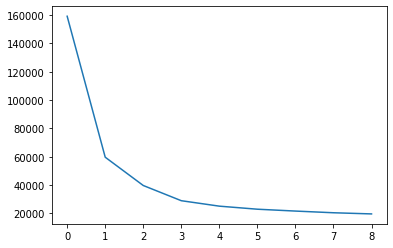

In [19]:
# Test optimal number of cluster with elbow methods

cost = []
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(alc_edu_freq_data, categorical=[0,1,2,3])
    cost.append(kproto.cost_)

plt.plot(cost)


In [20]:
print(cost)

[159135.47072265611, 59698.100072869085, 39740.3265423651, 29014.450189016454, 25168.14953934396, 23014.532525705774, 21703.332753474737, 20511.7396727178, 19695.314667113933]


In [21]:
# Testing with optimal number of clusters

kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(alc_edu_freq_data, categorical=[0,1,2,3])

cluster_dict =[]
for c in clusters:
    cluster_dict.append(c)

alc_edu_freq_with_clusters = alc_edu_freq_data.copy()
alc_edu_freq_with_clusters['clusters'] = cluster_dict

In [22]:
alc_edu_freq_data_clust_0 = alc_edu_freq_with_clusters[alc_edu_freq_with_clusters['clusters'] == 0 ]
alc_edu_freq_data_clust_1 = alc_edu_freq_with_clusters[alc_edu_freq_with_clusters['clusters'] == 1 ]
alc_edu_freq_data_clust_2 = alc_edu_freq_with_clusters[alc_edu_freq_with_clusters['clusters'] == 2 ]